In [2]:
import numpy as np
import pandas as pd
import keras
from keras import regularizers, optimizers
from keras.layers import Input, Conv1D, Dense, Flatten, Activation, UpSampling1D, Dropout, MaxPooling1D
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
dataset_loc = 'datasets/covertype/covtype.data'

cols = ['Elevation', 'Aspect', 'Slope', 'Hor2Hydro', 'Ver2Hydro', 'Hor2Road', 'Hillshade_9am', 'Hillshade_Noon',
        'Hillshade_3pm', 'Hor2FirePt']

for f in range(0, 4):
    cols.append('Wilderness_Area_{}'.format(f))
    
for f in range(0, 40):
    cols.append('Soil_Type_%d'%f)

cols.append("Cover_Type")

df = pd.read_csv(dataset_loc, sep=',', names=cols)
df.head()

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.tail()

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [5]:
pd.set_option('display.max_columns', 55)

In [6]:
for f in range(0, 40):
    df['Soil_Type_%d'%f] = StandardScaler().fit_transform(df['Soil_Type_%d'%f].values.reshape(-1, 1))

# df['Soil_Type_32'] = StandardScaler().fit_transform(df['Soil_Type_32'].values.reshape(-1, 1))
# df['Hor2FirePt'] = StandardScaler().fit_transform(df['Hor2FirePt'].values.reshape(-1, 1))
df.tail()

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581011,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3


In [7]:
#10 non categorical and considered class 4 as anomaly and class 2 as normal.

#class 2 only has 2747 points while class 4 has 283301 points.

normal = df[df['Cover_Type'] == 2]
anomalies = df[df['Cover_Type'] == 4]


normal.loc[normal.Cover_Type == 2, 'Cover_Type'] = 0
anomalies.loc[anomalies.Cover_Type == 4, 'Cover_Type'] = 1

anomalies.shape, normal.shape


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


((2747, 55), (283301, 55))

In [8]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:10000]
# data_set = pd.concat([normal[:100000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

# x_train = x_train.sort_values(by=['Time'])
# x_test = x_test.sort_values(by=['Time'])

y_train = x_train["Cover_Type"]
y_test = x_test["Cover_Type"]

x_train = x_train.drop("Cover_Type", axis=1)
x_test = x_test.drop("Cover_Type", axis=1)

x_train.head(10)

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
547498,3205,185,18,301,114,3650,221,249,155,469,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,-0.315238,3.444901,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
255976,2857,91,18,360,160,876,245,208,86,1033,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,5.686133,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
78550,2559,130,20,90,28,840,248,225,96,212,1,0,0,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,4.272931,-0.214980,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
363869,2620,358,27,218,69,1641,168,181,142,1533,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,4.099254,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
347841,2999,308,5,604,-121,1800,205,237,171,2212,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,4.651604,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
287936,2902,131,14,255,57,2173,242,232,116,779,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,3.172206,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
113006,2715,337,11,283,93,1080,196,225,168,1889,1,0,0,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,4.287867,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
328976,2498,352,15,153,29,120,192,212,157,446,0,0,0,1,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,4.099254,-0.147734,-0.2332

In [9]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(6000, 54)
y_train:(6000,)

x_test:(4000, 54)
y_test:(4000,)



In [10]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)
input_shape = (x_train.shape[1], 1)

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [11]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(6000, 54, 1)
y_train:(6000,)

x_test:(4000, 54, 1)
y_test:(4000,)

input_shape:(54, 1)



In [12]:

input_layer = Input(shape=(input_shape ))

#Series of temporal convolutional layers with dilations increasing by powers of 2.
conv_1 = Conv1D(filters=int(input_shape[0]), kernel_size=2, dilation_rate=1,
                padding='causal', strides=1,input_shape=input_shape,
                kernel_regularizer=regularizers.l2(0.01),
                activation='relu')(input_layer)

#Dropout layer after each 1D-convolutional layer
pool_1 = MaxPooling1D(pool_size=2, strides=2)(conv_1)

conv_2 = Conv1D(filters=int(input_shape[0] / 2), kernel_size=2, dilation_rate=1,
                padding='causal',strides=1, kernel_regularizer=regularizers.l2(0.01),
                activation='relu')(pool_1)

pool_2 = MaxPooling1D(pool_size=2, strides=3)(conv_2)

conv_3 = Conv1D(filters=int(input_shape[0] / 3), kernel_size=2, dilation_rate=1,
                padding='causal', strides=1,kernel_regularizer=regularizers.l2(0.01),
                activation='relu')(pool_2)

pool_3 = MaxPooling1D(pool_size=1, strides=1)(conv_3)

encoder = Dense(int(input_shape[0] / 6), activation='relu')(pool_3)


upsample_1 = UpSampling1D(size=3)(encoder)

conv_4 = Conv1D(filters=int(input_shape[0]/3), kernel_size=2, dilation_rate=1,
                padding='causal',strides=1, kernel_regularizer=regularizers.l2(0.01),
                activation='relu')(upsample_1)

upsample_2 = UpSampling1D(size=2)(conv_4)

conv_5 = Conv1D(filters=int(input_shape[0]/2), kernel_size=2, dilation_rate=1,
                padding='causal', strides=1,kernel_regularizer=regularizers.l2(0.05),
                activation='relu')(upsample_2)

upsample_3 = UpSampling1D(size=1)(conv_5)

conv_6 = Conv1D(filters=int(input_shape[0]), kernel_size=2, dilation_rate=1,
                padding='causal', strides=1,kernel_regularizer=regularizers.l2(0.05),
                activation='relu')(upsample_3)

upsample_4 = UpSampling1D(size=1)(conv_6)

flat = Flatten()(upsample_4)

output_layer = Dense(int(input_shape[0]))(flat)

# output_layer = Conv1D(filters=1, kernel_size=2, dilation_rate=1,
#                 padding='causal', strides=1,kernel_regularizer=regularizers.l2(0.05),
#                 activation='softmax')(conv_6)
#Flatten layer to feed into the output layer

#output_layer = Dense(1, activation='softmax')(conv_6)

TCN = Model(inputs=input_layer, outputs=output_layer)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
TCN.compile(loss=keras.losses.mean_squared_error,
              optimizer=optimizers.Adam(lr=0.002),
           metrics=["accuracy"])

checkpointer = ModelCheckpoint(filepath="model_ED-TCN_creditcard_semi.h5",
                               verbose=0,
                               save_best_only=True)

TCN.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 54, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 54, 54)            162       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 54)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 27)            2943      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 27)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 9, 18)             990       
_________________________________________________________________
max

In [26]:
TCN.fit(x_train, x_train.reshape(x_train.shape[0], x_train.shape[1]),
          batch_size=128,
          epochs=200,
          verbose=1,
          validation_data=(x_test,  x_test.reshape(x_test.shape[0], x_test.shape[1])),
          callbacks = [checkpointer])


Train on 6000 samples, validate on 4000 samples
Epoch 1/200
6000/6000 [==============================] - 0s - loss: 45.8399 - acc: 0.9963 - val_loss: 26.4045 - val_acc: 0.9988
Epoch 2/200
6000/6000 [==============================] - 1s - loss: 18.0471 - acc: 0.9980 - val_loss: 13.3690 - val_acc: 0.9988
Epoch 3/200
5760/6000 [===========================>..] - ETA: 0s - loss: 11.7048 - acc: 0.9979

KeyboardInterrupt: 

In [15]:
y_test

355982    0
231858    0
125878    0
258804    0
134496    0
439       0
162542    0
46013     0
343216    0
292376    0
286280    0
154368    0
171887    0
346936    0
413077    0
369851    0
498918    0
23330     0
463910    0
387296    0
492909    0
153102    0
161208    0
252222    0
548954    0
19440     0
73320     0
196187    0
562311    0
450287    0
         ..
553715    0
127999    0
501203    0
364267    0
356588    0
391523    0
154329    0
129799    0
549183    0
476000    0
408944    0
552938    0
396636    0
375972    0
511037    0
105444    0
400587    0
216484    0
523081    0
563254    0
390077    0
537702    0
410153    0
34579     0
352338    0
570274    0
52829     0
562073    0
156639    0
243840    0
Name: Cover_Type, Length: 4000, dtype: int64

In [16]:
# for f in range(0, len(x_test)):
#     print(x_test[f], predictions[f])

In [27]:
## EVAL ON X_TEST

predictions = TCN.predict(x_test)


mse = np.mean(np.power(x_test.reshape(x_test.shape[0], x_test.shape[1]) - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,4000.000000,4000.0
mean,9.776742,0.0
std,35.015740,0.0
min,1.201128,0.0
25%,4.124616,0.0
50%,6.152232,0.0
75%,9.689061,0.0
max,1260.771869,0.0


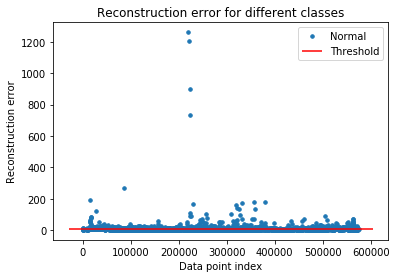

In [28]:
import matplotlib.pyplot as plt

threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

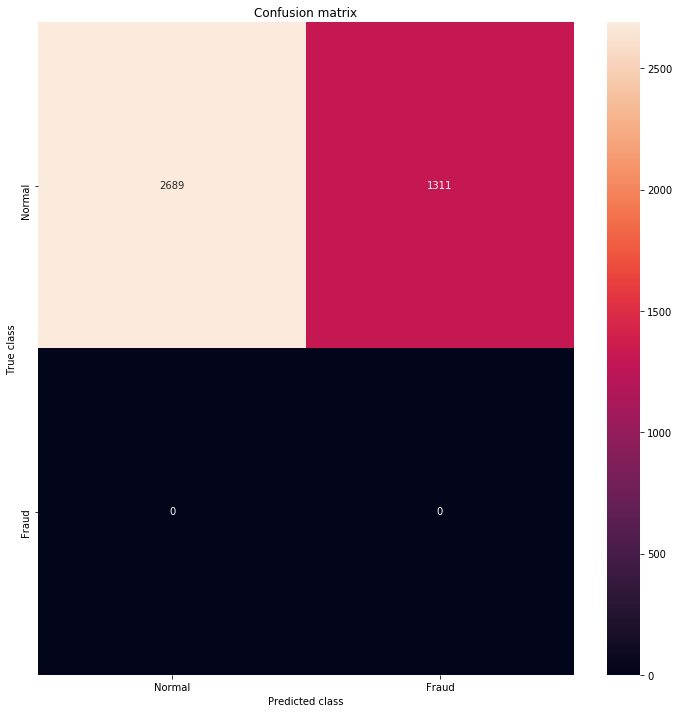

In [29]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [30]:
counter = []

for f in range(0, len(error_df)):
    if error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)
        

In [31]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, y_test)
print("AUC: {:.2%}".format (auc))

AUC: 50.00%


In [32]:
### EVAL ON ANOMALIES
anom_class = anomalies['Cover_Type']
anom = np.array(anomalies.drop('Cover_Type', axis=1))


anom_predictions = TCN.predict(anom.reshape(anom.shape[0], anom.shape[1], 1))

anom_mse = np.mean(np.power(anom.reshape(anom.shape[0], anom.shape[1]) - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,2747.000000,2747.0
mean,25.976850,1.0
std,27.626852,0.0
min,3.285986,1.0
25%,10.377403,1.0
50%,14.923430,1.0
75%,29.210856,1.0
max,307.050461,1.0


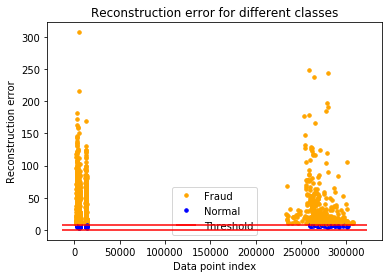

In [33]:
import matplotlib.pyplot as plt
# threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
# threshold = threshold.reconstruction_error
# threshold = threshold * 10
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

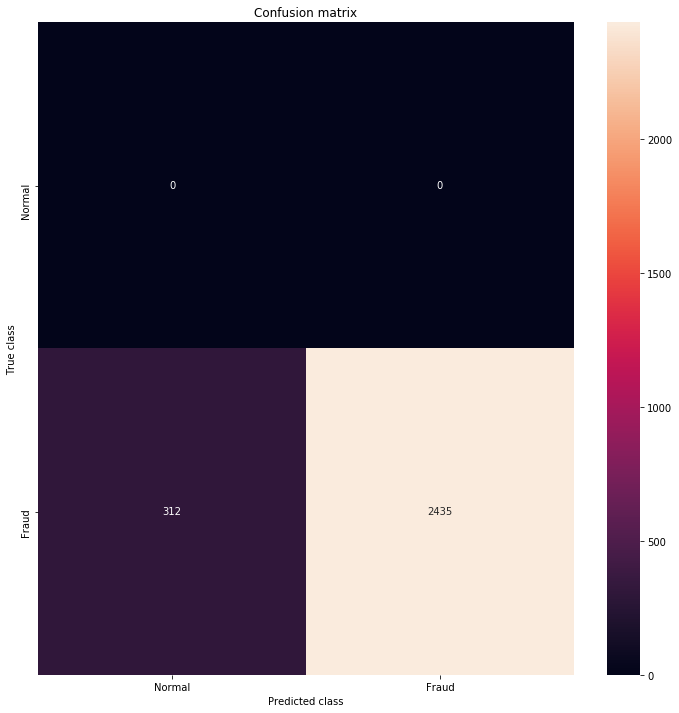

In [34]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in anom_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(anom_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [35]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.886421550782672


In [22]:
### TEST ON DF

points = np.array(df.drop('Class', axis=1))
truths = df['Class']

preds = TCN.predict(points.reshape(points.shape[0], points.shape[1], 1))

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()

,reconstruction_error,true_class
count,284807.000000,284807.000000
mean,0.224734,0.001727
std,1.063196,0.041527
min,0.006211,0.000000
25%,0.073664,0.000000
50%,0.125912,0.000000
75%,0.224795,0.000000
max,110.665665,1.000000


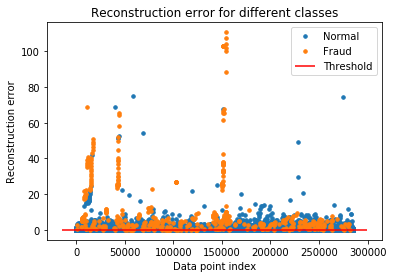

In [23]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

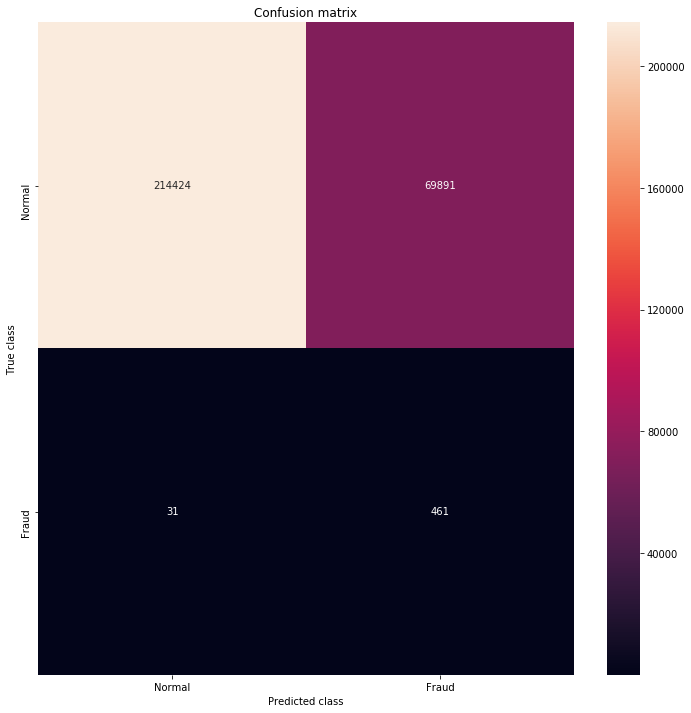

In [24]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [25]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [26]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

AUC: 50.32%
